In [19]:
from PIL import Image
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [20]:
csv_file_path = '../../dataset/aug_splits/1/val.csv'
pic_dir_path = '../../dataset/pictures'

In [21]:
df = pd.read_csv(csv_file_path)
df.head()

,fname,ammonia,chlorophyll,quality,ammonia_bin
0,../../dataset/pics/2020_02_20_3_Treat7_NoBag_2...,3.39,61.36,3,0
1,../../dataset/pics/augs/0-2020_02_20_3_Treat7_...,3.39,61.36,3,0
2,../../dataset/pics/augs/1-2020_02_20_3_Treat7_...,3.39,61.36,3,0
3,../../dataset/pics/augs/2-2020_02_20_3_Treat7_...,3.39,61.36,3,0
4,../../dataset/pics/augs/3-2020_02_20_3_Treat7_...,3.39,61.36,3,0


In [22]:
from agroalimentary_quality_control.modeling.dataset import RocketDataset, ContrastiveRocketDataset

In [23]:
dataset = ContrastiveRocketDataset(df, 'ammonia', 'fname', 4, 0.5)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

  0%|          | 0/162 [00:00<?, ?it/s]

tensor([ 1.1400,  4.1000, 81.2000,  0.4000], dtype=torch.float64)


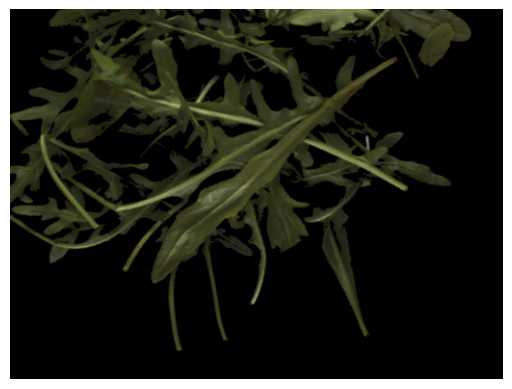

  0%|          | 0/162 [00:01<?, ?it/s]


In [24]:
for current, anchor, negative, target in tqdm(loader):
    print(target)
    negative = negative[0]
    negative = negative.permute(1, 2, 0)
    plt.imshow(negative.numpy())
    plt.axis('off')
    plt.show()
    
    break
